In [1]:
%run StatTest2_WithSimulation_Setup.ipynb

{0: ['ME', 'IL', 'PA', 'GA', 'OK', 'DE', 'WA', 'CT', 'OH', 'VA', 'NE', 'MT', 'IN', 'CA', 'HI', 'ND', 'MD', 'SC', 'RI', 'AK', 'KY', 'WI', 'LA', 'MN', 'MS', 'WV', 'FL'], 1: ['SD', 'IL', 'PA', 'NH', 'NM', 'NV', 'OK', 'UT', 'CT', 'OH', 'VA', 'OR', 'CO', 'IN', 'HI', 'AL', 'RI', 'AK', 'LA', 'MN', 'IA', 'AR', 'WV'], 2: ['MI', 'ME', 'WY', 'DC', 'TX', 'AZ', 'NC', 'WA', 'OR', 'CO', 'MT', 'ND', 'TN', 'SC', 'AL', 'NY', 'KY', 'NJ', 'KS', 'ID', 'IA', 'AR', 'MO'], 3: ['MI', 'SD', 'WY', 'NH', 'DC', 'TX', 'GA', 'AZ', 'NM', 'NC', 'NV', 'DE', 'UT', 'NE', 'CA', 'MD', 'TN', 'NY', 'NJ', 'KS', 'WI', 'ID', 'MS', 'FL', 'MO']}
{0: ['MI', 'SD', 'WY', 'NH', 'DC', 'TX', 'AZ', 'NM', 'NC', 'NV', 'UT', 'OR', 'CO', 'TN', 'AL', 'NY', 'NJ', 'KS', 'ID', 'IA', 'AR', 'MO'], 1: ['MI', 'ME', 'WY', 'DC', 'TX', 'GA', 'AZ', 'NC', 'DE', 'WA', 'NE', 'MT', 'CA', 'ND', 'MD', 'TN', 'SC', 'NY', 'KY', 'NJ', 'KS', 'WI', 'ID', 'MS', 'FL', 'MO'], 2: ['SD', 'IL', 'PA', 'NH', 'GA', 'NM', 'NV', 'OK', 'DE', 'UT', 'CT', 'OH', 'VA', 'NE', 'IN'

In [2]:
data2014 = pd.read_csv("Our_Dataset/2014dataset.csv")
data2015 = pd.read_csv("Our_Dataset/2015dataset.csv")
data2016 = pd.read_csv("Our_Dataset/2016dataset.csv")
data2017 = pd.read_csv("Our_Dataset/2017dataset.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,52,323,649,882,932,1092,1202) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,57,204,341,376,377,396,430,431,928,944,1006,1013,1151,1160,1169,1179,1411) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,17,163,355,406,702,835,847,1083,1156,1183,1185,1200) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Create the labels.
# By index:
# label 2 is transfers
# label 3 is premiums
# label 4 is costs
# label 5 is member months
# label 6 is reinsurance (individual group only)

ind_labels_14 = ["HIOS ID", "HIOS INPUTTED INSURANCE COMPANY NAME",
                  "HHS RISK ADJUSTMENT TRANSFER AMOUNT (INDIVIDUAL MARKET, INCLUDING CATASTROPHIC)",
                  "1.1Directpremiumwritten2HealthInsuranceINDIVIDUALTotalasof3/31/15",
                  "2.16Totalincurredclaims2HealthInsuranceINDIVIDUALTotalasof3/31/15",
                  "7.4Membermonths2HealthInsuranceINDIVIDUALTotalasof3/31/15",
                  "STATE", "REINSURANCE PAYMENT AMOUNT (OR NOT ELIGIBLE)"] # no more reinsurance as of 2017
ind_labels_15 = [label.replace('15', '16') for label in ind_labels_14]
ind_labels_16 = [label.replace('15', '17') for label in ind_labels_14]
ind_labels_17 = [label.replace('15', '18') for label in ind_labels_14][:-1]

sg_labels_14 = ["HIOS ID", "HIOS INPUTTED INSURANCE COMPANY NAME",
                 "HHS RISK ADJUSTMENT TRANSFERS AMOUNT (SMALL GROUP MARKET)",
                  "1.1Directpremiumwritten7HealthInsuranceSMALLGROUPTotalasof3/31/15",
                  "2.16Totalincurredclaims7HealthInsuranceSMALLGROUPTotalasof3/31/15",
                  "7.4Membermonths7HealthInsuranceSMALLGROUPTotalasof3/31/15", "STATE"]
sg_labels_15 = [label.replace('15', '16') for label in sg_labels_14]
sg_labels_16 = [label.replace('15', '17') for label in sg_labels_14]
sg_labels_17 = [label.replace('15', '18') for label in sg_labels_14]

In [4]:
# Filter the data to include only the fields we want

ind_data_14 = data2014[ind_labels_14].dropna()
ind_data_15 = data2015[ind_labels_15].dropna()
ind_data_16 = data2016[ind_labels_16].dropna()
ind_data_17 = data2017[ind_labels_17].dropna()
sg_data_14 = data2014[sg_labels_14].dropna()
sg_data_15 = data2015[sg_labels_15].dropna()
sg_data_16 = data2016[sg_labels_16].dropna()
sg_data_17 = data2017[sg_labels_17].dropna()

In [5]:
# Drop companies with <2000 MM
ind_data_14 = ind_data_14.where(ind_data_14[ind_labels_14[5]] > 2000).dropna()
ind_data_15 = ind_data_15.where(ind_data_15[ind_labels_15[5]] > 2000).dropna()
ind_data_16 = ind_data_16.where(ind_data_16[ind_labels_16[5]] > 2000).dropna()
ind_data_17 = ind_data_17.where(ind_data_17[ind_labels_17[5]] > 2000).dropna()
sg_data_14 = sg_data_14.where(sg_data_14[sg_labels_14[5]] > 2000).dropna()
sg_data_15 = sg_data_15.where(sg_data_15[sg_labels_15[5]] > 2000).dropna()
sg_data_16 = sg_data_16.where(sg_data_16[sg_labels_16[5]] > 2000).dropna()
sg_data_17 = sg_data_17.where(sg_data_17[sg_labels_17[5]] > 2000).dropna()

In [6]:
# Calculate transfers, premiums, costs, and reinsurance (if individual group) per member month
def calculate_pmm(df, df_labels, group):
    df["MM"] = df[df_labels[5]]
    df["Transfers"] = df[df_labels[2]]
    df["TotalCosts"] = abs(df[df_labels[4]])
    df["Enrollees"] = df["MM"] / 12
    df["TransfersPerEnrollee"] = df["Transfers"] / df["Enrollees"]
    df["TransfersPerSqrtEnrollee"] = df["Transfers"] / np.sqrt(df["Enrollees"])
    df["LogEnrollees"] = np.log(df["Enrollees"])
    df["LogTransfers"] = np.log(df["Transfers"]**2 + 1)
    df["TransfersPMM"] = df[df_labels[2]] / df[df_labels[5]]
    df["PremiumsPMM"] = abs(df[df_labels[3]] / df[df_labels[5]])
    df["CostsPMM"] = abs(df[df_labels[4]] / df[df_labels[5]])
    if group == "i":
        df["ReinsurancePMM"] = df[df_labels[7]] / df[df_labels[5]]
        df["ProfitsPMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["TransfersPMM"] + df["ReinsurancePMM"]
        #df["PremMinusCostsPlusReinsurancePMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["ReinsurancePMM"]
    elif group == "sg":
        df["ProfitsPMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["TransfersPMM"]
    df["PremMinusCostsPMM"] = df["PremiumsPMM"] - df["CostsPMM"]
    df["PremMinusCostsPlusTransfersPMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["TransfersPMM"]
    df["SicknessPMM"] = df["CostsPMM"] - df["PremiumsPMM"]
    average_sickness = np.mean(df["SicknessPMM"])
    df["ExcessSicknessPMM"] = df["SicknessPMM"] - average_sickness
    return df

ind_data_14 = calculate_pmm(ind_data_14, ind_labels_14, "i")
ind_data_15 = calculate_pmm(ind_data_15, ind_labels_15, "i")
ind_data_16 = calculate_pmm(ind_data_16, ind_labels_16, "i")
ind_data_17 = calculate_pmm(ind_data_17, ind_labels_17, "sg")
sg_data_14 = calculate_pmm(sg_data_14, sg_labels_14, "sg")
sg_data_15 = calculate_pmm(sg_data_15, sg_labels_15, "sg")
sg_data_16 = calculate_pmm(sg_data_16, sg_labels_16, "sg")
sg_data_17 = calculate_pmm(sg_data_17, sg_labels_17, "sg")

In [7]:
# Combine the dataframes by left merging

ind_data = ind_data_14.merge(ind_data_15, on='HIOS ID', how='outer', suffixes=('_14', '_15'))\
.merge(ind_data_16, on='HIOS ID', how='outer').merge(ind_data_17, on='HIOS ID', how='outer', suffixes=('_16', '_17'))

In [8]:
# Do the same thing for small group

sg_data = sg_data_14.merge(sg_data_15, on='HIOS ID', how='outer', suffixes=('_14', '_15'))\
.merge(sg_data_16, on='HIOS ID', how='outer').merge(sg_data_17, on='HIOS ID', how='outer', suffixes=('_16', '_17'))

In [9]:
states = list(set(sg_data_14["STATE"]))
dfs = [sg_data_14, sg_data_15, sg_data_16, sg_data_17]

In [10]:
dfs_new = normalize_empirical_data_split_randomly_for_years_2(dfs)

229
295
280
186
MI 14 Ratio is 1.186
SD 14 Ratio is 1.047
WY 14 Ratio is 0.922
NH 14 Ratio is 0.962
DC 14 Ratio is 1.033
TX 14 Ratio is 1.073
AZ 14 Ratio is 1.358
NM 14 Ratio is 1.036
NC 14 Ratio is 1.137
NV 14 Ratio is 1.237
UT 14 Ratio is 1.476
OR 14 Ratio is 1.095
CO 14 Ratio is 1.091
TN 14 Ratio is 1.312
AL 14 Ratio is 1.048
NY 14 Ratio is 0.882
NJ 14 Ratio is 1.063
KS 14 Ratio is 1.262
ID 14 Ratio is 1.346
IA 14 Ratio is 1.195
AR 14 Ratio is 1.336
MO 14 Ratio is 1.282
MI 15 Ratio is 1.133
ME 15 Ratio is 1.074
WY 15 Ratio is 0.882
DC 15 Ratio is 1.014
TX 15 Ratio is 0.984
GA 15 Ratio is 1.087
AZ 15 Ratio is 1.273
NC 15 Ratio is 1.070
DE 15 Ratio is 1.103
WA 15 Ratio is 1.048
NE 15 Ratio is 1.078
MT 15 Ratio is 0.998
CA 15 Ratio is 1.013
ND 15 Ratio is 0.994
MD 15 Ratio is 1.151
TN 15 Ratio is 1.256
SC 15 Ratio is 0.957
NY 15 Ratio is 0.812
KY 15 Ratio is 1.177
NJ 15 Ratio is 0.915
KS 15 Ratio is 1.114
WI 15 Ratio is 0.996
ID 15 Ratio is 1.299
MS 15 Ratio is 1.183
FL 15 Ratio is 1.0

In [11]:
mm_total = 0
for adf in dfs_new:
    mm_total = mm_total + sum(adf["MM"])
print(mm_total)

325286682.6433


In [12]:
for df_temp in dfs_new:
    df_temp["TransfersNormalizedPerSqrtEnrollee"] = df_temp["TransfersNormalized"] / np.sqrt(df_temp["Enrollees"])

In [13]:
df2 = create_df2_without_states(dfs_new, "TransfersNormalizedPerSqrtEnrollee")

In [14]:
k = len(df2)
v = np.linspace(0, max(abs(df2)), 10000)
v = v[1:len(v)]

ratios = [ratio_list(df2, vi) for vi in v]
#print(ratios)
begin_p = 5/k
end_p = 1-begin_p
start_index = 0
end_index = 0
for index, ratio2 in enumerate(ratios):
    if ratio2 >= begin_p:
        start_index = index
        break
    
for index, ratio2 in enumerate(ratios):
    if ratio2 > end_p:
        end_index = index
        break

if end_index == 0:
    end_index = len(v) - 1
    
v = v[start_index:end_index]

ratios2 = ratios[start_index:end_index]
multiplier = [np.sqrt(2)/vi for vi in v]
#plt.plot(v, ratios2)
#plt.plot(v, multiplier)

In [15]:
y = [multiplier[i] * special.erfinv(ratio2) for i, ratio2 in enumerate(ratios2)]
#plt.plot(v, y)
#plt.title("1/beta vs. v")
beta = [1/yi for yi in y]
#plt.plot(v, beta)
#plt.axvline(x=64432.69, color='r', linestyle='--', label="Point of max difference")
#plt.title("beta vs. v")

In [16]:
# Finding the minimum beta
# Whenever we reject a beta, we reject all betas greater than that,
# so keep pushing beta smaller until we reach max_difference == test_statistic
# Run test for larger data sizes (combining states, years)

In [17]:
max_beta=max(beta)
max_beta = int(max_beta/100)*100

In [18]:
state_label = "All States"

beta = 83400.000


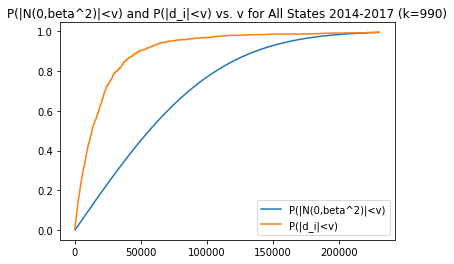

In [19]:
theoretical = [special.erf(vi/(max_beta*np.sqrt(2))) for vi in v]

plt.plot(v, theoretical, label="P(|N(0,beta^2)|<v)")
plt.plot(v, ratios2, label="P(|d_i|<v)")
plt.title("P(|N(0,beta^2)|<v) and P(|d_i|<v) vs. v for %s 2014-2017 (k=%d)" % (state_label, len(df2)))
#plt.axvline(x=64432.69, color='r', linestyle='--', label="Point of max difference")
plt.legend()
print("beta = %.3f" % (max_beta))

In [20]:
beta1, Mb_index = run_test_against_theoretical(df2, max_beta, ratios2)

k = 990
test_stat at this k = 0.04316

At the point of maximum difference with beta = 83400:
P(|d_i|<v) = 0.7838
P(|N(0,max_beta^2)|<v) = 0.2743
Difference = 0.5095




At the point of maximum difference with beta = 73400:
P(|d_i|<v) = 0.7828
P(|N(0,max_beta^2)|<v) = 0.3088
Difference = 0.4740




At the point of maximum difference with beta = 63400:
P(|d_i|<v) = 0.7828
P(|N(0,max_beta^2)|<v) = 0.3544
Difference = 0.4284




At the point of maximum difference with beta = 53400:
P(|d_i|<v) = 0.7253
P(|N(0,max_beta^2)|<v) = 0.3500
Difference = 0.3753




At the point of maximum difference with beta = 43400:
P(|d_i|<v) = 0.7212
P(|N(0,max_beta^2)|<v) = 0.4192
Difference = 0.3020




At the point of maximum difference with beta = 33400:
P(|d_i|<v) = 0.5384
P(|N(0,max_beta^2)|<v) = 0.3341
Difference = 0.2042




At the point of maximum difference with beta = 23400:
P(|d_i|<v) = 0.4162
P(|N(0,max_beta^2)|<v) = 0.3200
Difference = 0.0962




At the point of maximum difference with beta = 2340

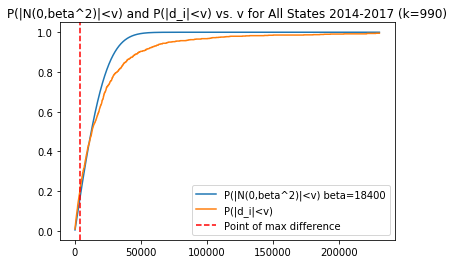

In [21]:
beta1 = beta1+100

theoretical = [special.erf(vi/(beta1*np.sqrt(2))) for vi in v]

plt.plot(v, theoretical, label="P(|N(0,beta^2)|<v) beta=%d" % (beta1))
plt.plot(v, ratios2, label="P(|d_i|<v)")
plt.title("P(|N(0,beta^2)|<v) and P(|d_i|<v) vs. v for %s 2014-2017 (k=%d)" % (state_label, len(df2)))
plt.axvline(x=v[Mb_index], color='r', linestyle='--', label="Point of max difference")
plt.legend()
#plt.xlim(0, 50000)
#print("beta = %.3f" % (max_beta))

In [22]:
run_binom_stat_test2(beta1, df2.values)

Beta (=std): 18400
Number of T/sqrt(n) above 2 stds: 160
Proportion of T/sqrt(n) above 2 stds: 0.162
P value = 0.000000


In [23]:
#df3 = create_df3(states, dfs_new)

In [24]:
ratios_c, _ = create_simulation_adjust_for_imbalances(states, dfs_new, beta1 - 10000)
ratios_c2, _ = create_simulation_adjust_for_imbalances(states, dfs_new, beta1)
ratios_c3, _ = create_simulation_adjust_for_imbalances(states, dfs_new, beta1 + 10000)

Sum sqrt(a) = 103287.103
Sum sqrt(a) = 103287.103
Sum sqrt(a) = 103287.103


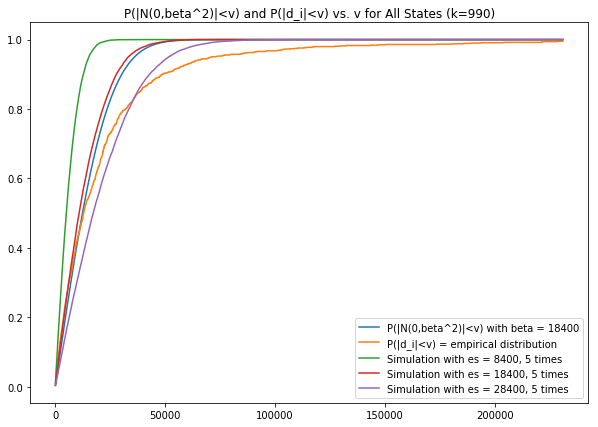

In [25]:
theoretical = [special.erf(vi/(beta1*np.sqrt(2))) for vi in v]

plt.figure(figsize=(10, 7))
plt.plot(v, theoretical, label="P(|N(0,beta^2)|<v) with beta = %d" % (beta1))
plt.plot(v, ratios2, label="P(|d_i|<v) = empirical distribution")
plt.plot(v, ratios_c, label="Simulation with es = %d, 5 times" % (beta1 - 10000))
plt.plot(v, ratios_c2, label="Simulation with es = %d, 5 times" % (beta1))
plt.plot(v, ratios_c3, label="Simulation with es = %d, 5 times" % (beta1 + 10000))
plt.title("P(|N(0,beta^2)|<v) and P(|d_i|<v) vs. v for %s (k=%d)" % (state_label, len(df2)))
plt.legend()

In [26]:
beta1, _ = run_test_against_simulation_adjust_for_imbalances(states, dfs_new, beta1, ratios2)

k = 990
test_stat at this k = 0.04316
Sum sqrt(a) = 103287.103

At the point of maximum difference with beta = 18400:
P(|d_i|<v) = 0.1283
P(|N(0,max_beta^2)|<v) = 0.1018
Difference = 0.0265 NOT > test_stat
Sum sqrt(a) = 103287.103

At the point of maximum difference with beta = 28400:
P(|d_i|<v) = 0.4162
P(|N(0,max_beta^2)|<v) = 0.2982
Difference = 0.1179



Sum sqrt(a) = 103287.103

At the point of maximum difference with beta = 28300:
P(|d_i|<v) = 0.4162
P(|N(0,max_beta^2)|<v) = 0.3055
Difference = 0.1106



Sum sqrt(a) = 103287.103

At the point of maximum difference with beta = 28200:
P(|d_i|<v) = 0.4162
P(|N(0,max_beta^2)|<v) = 0.3032
Difference = 0.1130



Sum sqrt(a) = 103287.103

At the point of maximum difference with beta = 28100:
P(|d_i|<v) = 0.4141
P(|N(0,max_beta^2)|<v) = 0.3007
Difference = 0.1135



Sum sqrt(a) = 103287.103

At the point of maximum difference with beta = 28000:
P(|d_i|<v) = 0.4111
P(|N(0,max_beta^2)|<v) = 0.2979
Difference = 0.1132



Sum sqrt(a) = 10328

Sum sqrt(a) = 103287.103

At the point of maximum difference with beta = 23200:
P(|d_i|<v) = 0.2919
P(|N(0,max_beta^2)|<v) = 0.2323
Difference = 0.0597



Sum sqrt(a) = 103287.103

At the point of maximum difference with beta = 23100:
P(|d_i|<v) = 0.2919
P(|N(0,max_beta^2)|<v) = 0.2306
Difference = 0.0613



Sum sqrt(a) = 103287.103

At the point of maximum difference with beta = 23000:
P(|d_i|<v) = 0.2707
P(|N(0,max_beta^2)|<v) = 0.2060
Difference = 0.0647



Sum sqrt(a) = 103287.103

At the point of maximum difference with beta = 22900:
P(|d_i|<v) = 0.2707
P(|N(0,max_beta^2)|<v) = 0.2087
Difference = 0.0620



Sum sqrt(a) = 103287.103

At the point of maximum difference with beta = 22800:
P(|d_i|<v) = 0.2707
P(|N(0,max_beta^2)|<v) = 0.2149
Difference = 0.0558



Sum sqrt(a) = 103287.103

At the point of maximum difference with beta = 22700:
P(|d_i|<v) = 0.2919
P(|N(0,max_beta^2)|<v) = 0.2352
Difference = 0.0568



Sum sqrt(a) = 103287.103

At the point of maximum difference with beta

In [27]:
run_binom_stat_test2(beta1, df2.values)

Beta (=std): 21600
Number of T/sqrt(n) above 2 stds: 124
Proportion of T/sqrt(n) above 2 stds: 0.125
P value = 0.000000
